In [1]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=043975a20570e0f474fabd5a8f8af8f7d91964c14613502077c53397b6dd4996
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from lime import lime_tabular
from google.colab import drive
from xgboost import XGBClassifier

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Define paths for model and dataset
model_path = '/content/drive/My Drive/IDS models/best_model_xgboost'
test_file_path = '/content/drive/My Drive/IDS Dataset 2/NF-ToN-IoT-V2_15000 samples_minmax_normalized_test.csv'

# Load the saved XGBoost model
xgboost_model = joblib.load(model_path)

# Load test dataset
test_data = pd.read_csv(test_file_path)
X_test = test_data.iloc[:, :-2]  # Features
y_test = test_data.iloc[:, -1]   # Labels

# Encode labels if necessary
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
class_names = label_encoder.classes_  # Retrieve class names

# Check shapes of data and model predictions
print(f"Feature matrix shape: {X_test.shape}")
print(f"Number of classes: {len(class_names)}")




Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:48:33] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


Feature matrix shape: (3003, 41)
Number of classes: 10


In [3]:
 #SHAP Explainability
# Initialize SHAP explainer using TreeExplainer (specific to tree-based models like XGBoost)
explainer = shap.TreeExplainer(xgboost_model)
# محاسبه مقادیر shap برای مجموعه تست
shap_values = explainer.shap_values(X_test)

9


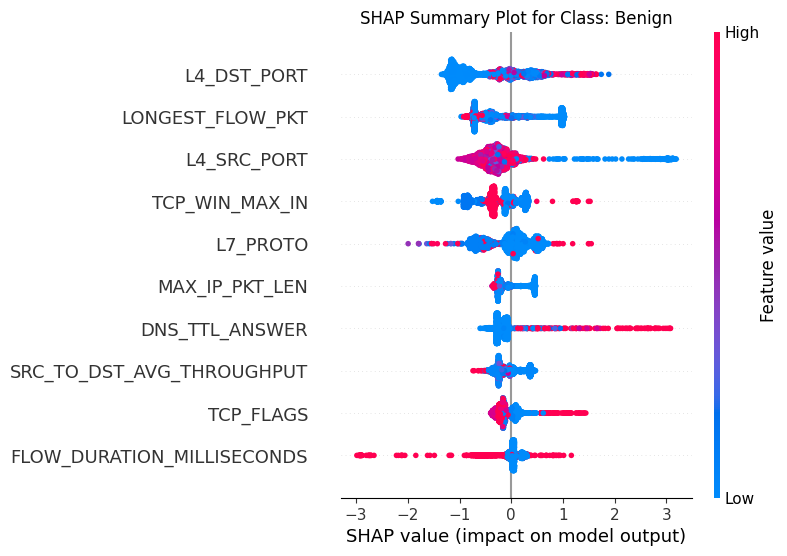

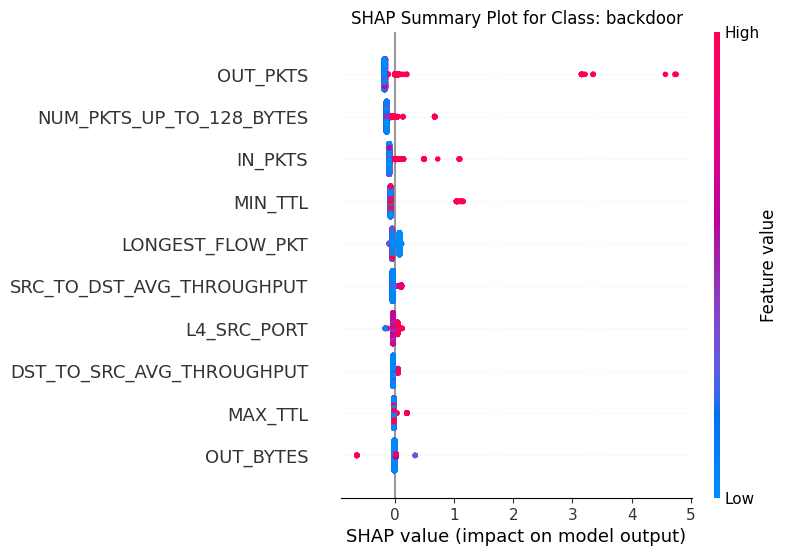

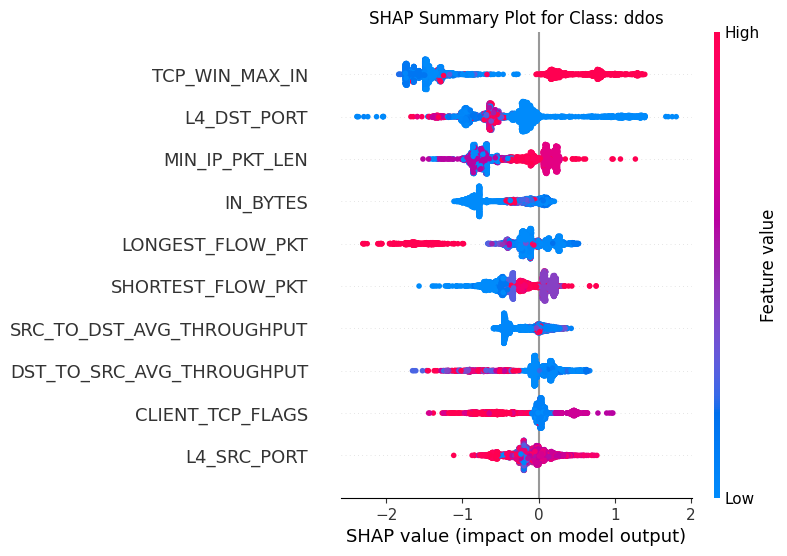

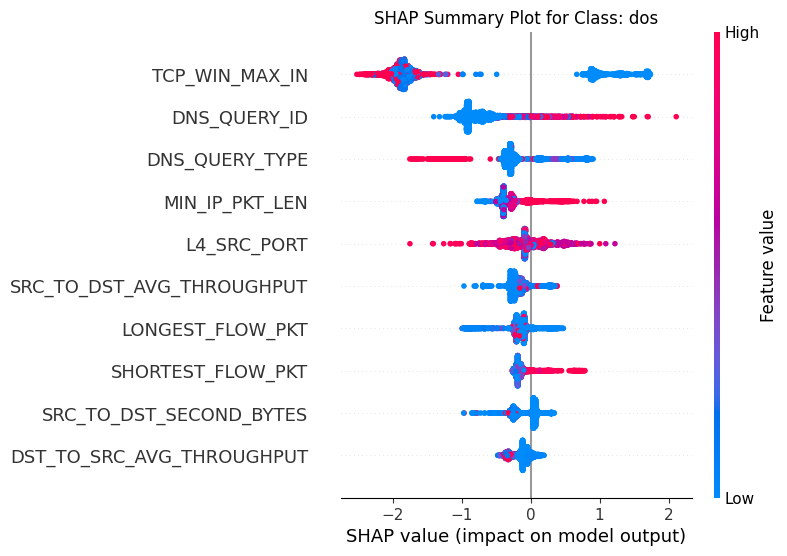

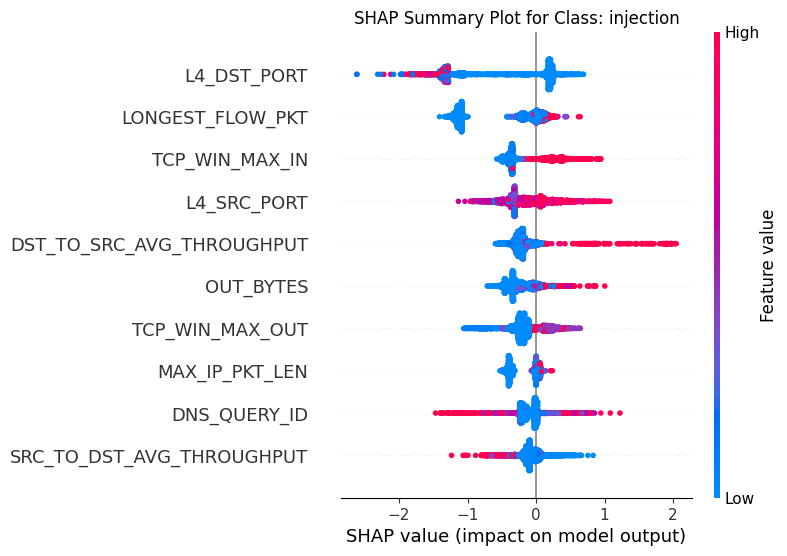

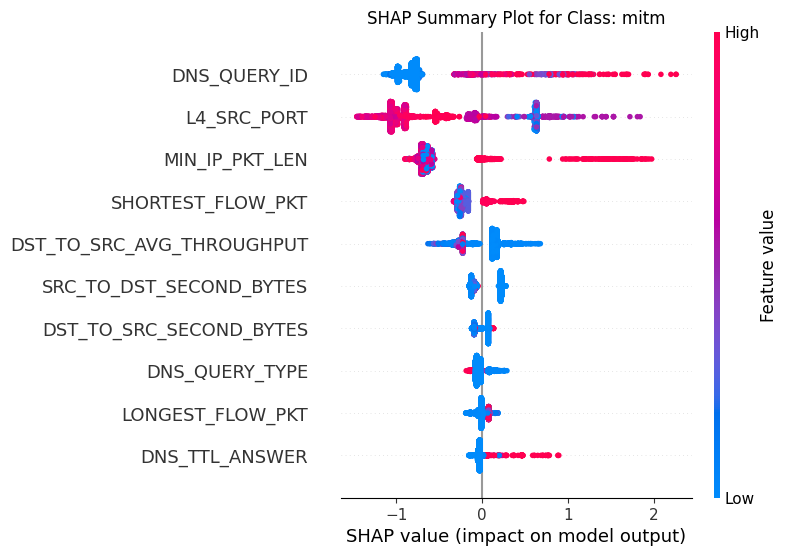

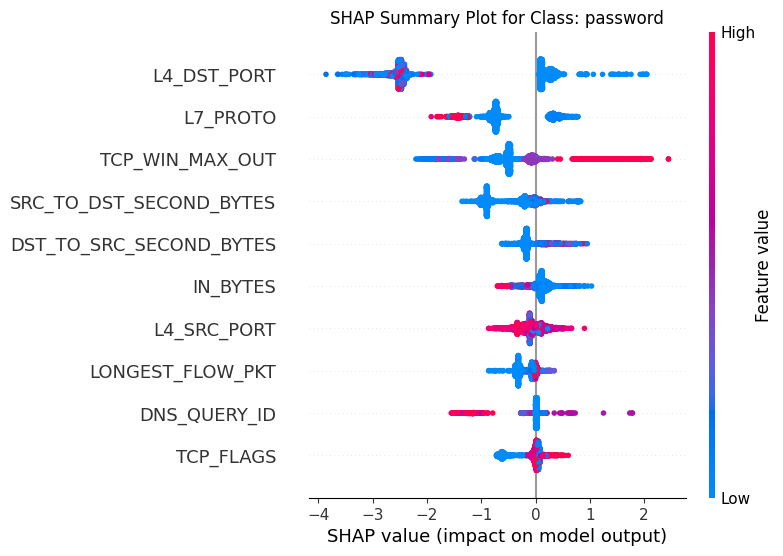

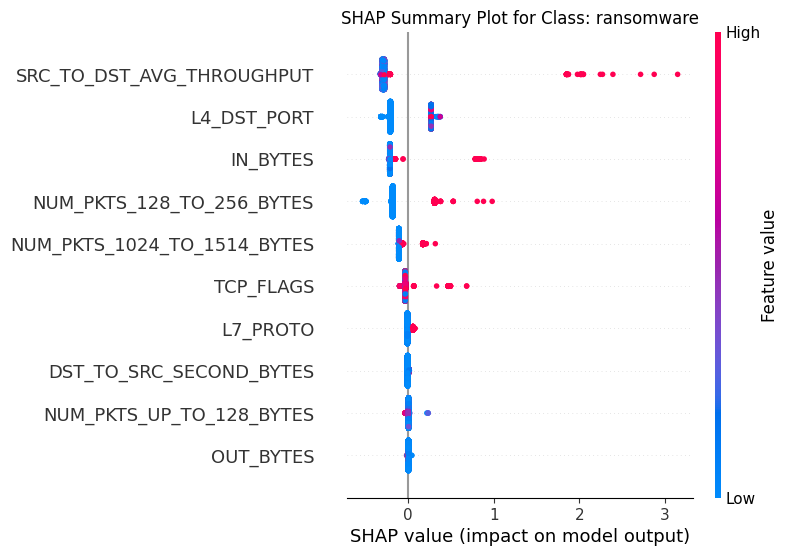

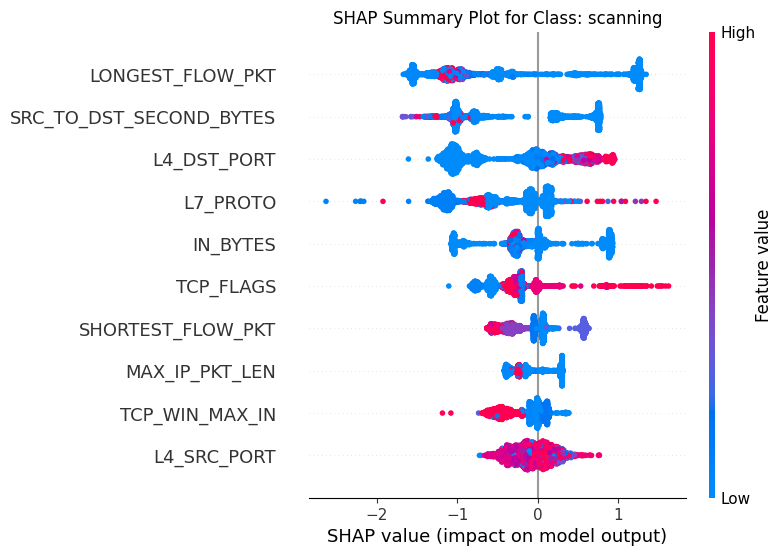

In [4]:
import matplotlib.pyplot as plt

# Plotting with adjusted figure size
num_classes = shap_values.shape[2] -1
print(num_classes)
for class_index in range(num_classes):
    shap_values_class = shap_values[:, :, class_index]

    # Set figure size before plotting
    plt.figure(figsize=(10, 6))  # Adjust width and height as needed


    shap.summary_plot(shap_values_class, X_test, feature_names=X_test.columns,
                      max_display=10, show=False)
    class_name = class_names[class_index]
    plt.title(f"SHAP Summary Plot for Class: {class_name}")

In [11]:
# Define directory to save SHAP values and datasets
save_dir = '/content/drive/My Drive/SHAP_saved_NF_ToN_IoT_V2'  # Ensure this directory exists in your Google Drive

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Define paths to save SHAP values and datasets
shap_values_path = os.path.join(save_dir, 'shap_values.pkl')
X_test_path = os.path.join(save_dir, 'X_test.pkl')
y_test_path = os.path.join(save_dir, 'y_test.pkl')
explainer_path = os.path.join(save_dir, 'shap_explainer.pkl')


In [12]:
# Save SHAP values, X_test, y_test, and explainer
joblib.dump(shap_values, shap_values_path)
joblib.dump(X_test, X_test_path)
joblib.dump(y_test, y_test_path)
joblib.dump(explainer, explainer_path)

print("Saved SHAP values, explainer, and datasets successfully.")

Saved SHAP values, explainer, and datasets successfully.


/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

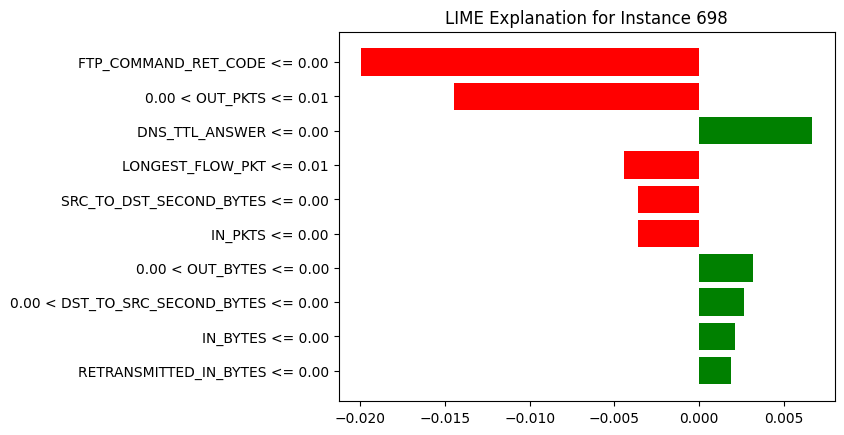

In [9]:
# ---- LIME Explainability ----
# Initialize LIME Tabular Explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test),
    feature_names=X_test.columns,
    class_names=class_names,
    mode='classification'
)

# Select an instance to explain (e.g., instance 698)
instance_to_explain = X_test.iloc[698]

# Generate LIME explanation for the selected instance
lime_exp = lime_explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=xgboost_model.predict_proba
)

# Plot LIME explanation
lime_exp.as_pyplot_figure()
plt.title('LIME Explanation for Instance 698')
plt.show()
